In [1]:
from itertools import *
from random import shuffle, randint
import pdb
from time import time
from functools import reduce
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import math

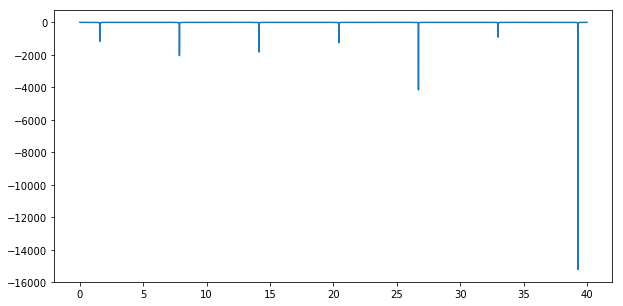

In [23]:
low = np.linspace(0,40,20000)
def compute(i):
    return math.cos(1+i)/math.acos(math.sin(i))
y = list(map(compute,low))
plt.figure(figsize=(10,5))
plt.plot(low,y);

In [21]:
math.cos(1+31)/math.acos(math.sin(31))

0.41989920998633573

In [18]:
lowest = 0
idx = 1
for i,m in enumerate(y):
    if m < lowest:
        lowest = m
        idx = i
lowest, low[idx]

(-39930434.90091972, 1.5707963463463464)

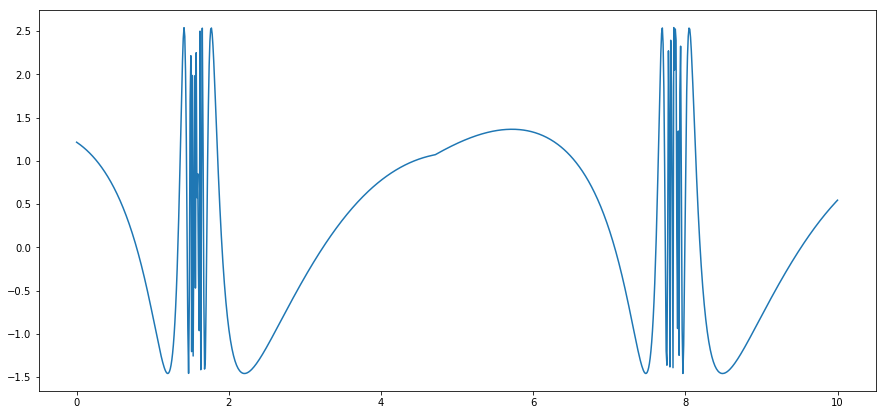

In [13]:
low = np.linspace(0,10,1000)
def compute(i):
    return math.cos(1) + 2* math.sin(math.cos(1+i)/math.acos(math.sin(i)))
y = list(map(compute,low))
plt.figure(figsize=(15,7))
plt.plot(low,y);

## to find one closest number in an array for every number in that same array

In [4]:
a = np.arange(1,9000)
shuffle(a)

In [9]:
#%%timeit
start = time()
pairs = []
for x in a:
    closest = 1
    dist = 100
    for w in a:
        if w!=x and abs(x-w)<dist:
            closest = w
            dist = abs(x-w)
    pairs.append([x,closest])
end = time()
pairs[:4],end-start

([[888, 889], [5222, 5223], [8606, 8605], [2144, 2145]], 25.852617025375366)

Next I think of a way to get rid of the for loops with some maps. However, it takes longer to process the function with maps, which should be faster because map uses multiple threads as I recall it. I do see memory usage gets much higher than when it was the loops.

In [11]:
#%%timeit
start = time()
def get_exclusion(k): c = list(a).copy(); c.remove(k); return c
line_up = list(tuple(map(lambda x:(list(repeat(x,len(a)-1)),get_exclusion(x)),a)))
mid = time()
def get_pair(w,p): index = np.argmin(list(map(lambda aa,bb:abs(aa-bb),w,p)));pair=[w[0],p[index]];return pair
pairs = list(starmap(get_pair,line_up))
end = time()
pairs[:4],end-start

([[888, 889], [5222, 5223], [8606, 8605], [2144, 2145]], 37.11013698577881)

I continue explore and use all functions with only one execution line. This attempt has all maps and iterators, should be faster. However, I see it takes even longer but strangely enough not higher memory usage.

In [12]:
#%%timeit
start = time()
def get_exclusion(k): c = list(a).copy(); c.remove(k); return c
mid1 = time()
def get_closest(w):
    def closer(aa,bb):
        if abs(aa-w)>abs(bb-w):
            return bb
        else:
            return aa
    closest = reduce(closer,get_exclusion(w))
    return [w,closest]
mid2 = time()
pairs = list(map(get_closest,a))
end = time()
pairs[:4],end - start

([[888, 889], [5222, 5223], [8606, 8605], [2144, 2145]], 36.182109355926514)

In [44]:
b = np.arange(1,1000000)

In [45]:
start = time()
sqrt = list(map(np.sqrt,b))
end = time()
end-start

1.0577807426452637

In [46]:
start = time()
sqrt = []
for x in b:
    sqrt.append(np.sqrt(x))
end = time()
end - start

1.332533836364746

In [47]:
bb = pd.Series(b)
start = time()
bb.apply(np.sqrt)
end = time()
end-start

0.008504152297973633

In [49]:
aa = pd.Series(a)
#%%timeit
start = time()
def get_exclusion(k): c = list(a).copy(); c.remove(k); return c
mid1 = time()
def get_closest(w):
    def closer(aa,bb):
        if abs(aa-w)>abs(bb-w):
            return bb
        else:
            return aa
    closest = reduce(closer,get_exclusion(w))
    return [w,closest]
mid2 = time()
pairs = aa.apply(get_closest)
end = time()
pairs[:4],end - start

(0      [888, 889]
 1    [5222, 5223]
 2    [8606, 8605]
 3    [2144, 2145]
 dtype: object, 51.39401364326477)

In [64]:
aaa = np.arange(1,300000)

In [67]:
start = time()
smallest = aaa[0]
for i in range(len(aaa)-1):
    if aaa[i]<smallest:
        smallest = aaa[i+1]
end = time()
smallest,end-start

(1, 0.08104896545410156)

In [68]:
start = time()
def smaller(x,y):
    if x>y:
        return y
    else:
        return x
smallest = reduce(smaller,aaa)
end = time()
smallest,end-start

(1, 0.06254291534423828)

In [69]:
start = time()
smallest = np.min(aaa)
#smallest = min(a)
end = time()
smallest, end-start

(1, 0.0005002021789550781)